In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern

cmaps = plt.get_cmap("Dark2")
print(cmaps.colors)

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4))


In [21]:
def plot_gpr_samples(gpr_model, n_samples, ax1,ax2,ls,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax2.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
            color=color_list[idx]
        )
    ax2.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax2.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax2.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_xlim([0, 5])
    ax2.set_ylim([-3, 3])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))
    #ax1.plot(X[:,0],gpr_model.kernel.__call__(X,Y,eval_gradient=False)[:,0],color="black",linestyle=ls,label=kernelname)
    ax1.scatter(0,1,color='black',label=kernelname,s=50)
    ax1.set_xlim(0,5)
    ax1.set_ylim(0,1.2)
    print()
    
    

In [19]:
#fonction pour afficher une fct de cov et des samples
def plot_samples1(kernel,rs):
    gpr=GaussianProcessRegressor(kernel=kernel, random_state=rs)
    fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(8, 3))
    plot_gpr_samples(gpr,3, ax1,ax2,'-','Diagonal')
    ax1.legend()
    
    
def plot_samples(k1,k2,k3,rs):
    gpr1=GaussianProcessRegressor(kernel=k1, random_state=rs)
    gpr2=GaussianProcessRegressor(kernel=k2, random_state=rs)
    gpr3=GaussianProcessRegressor(kernel=k3, random_state=rs)
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,nrows=1, figsize=(16, 3))
    plot_gpr_samples(gpr1,3, ax1,ax2,'-','Matern 1/2')
    plot_gpr_samples(gpr2,3, ax1,ax3,'--','Matern 3/2')
    plot_gpr_samples(gpr3,3, ax1,ax4,':','Matern 5/2')
    ax1.set_xlabel("d")
    ax1.set_ylabel("c(d)")
    ax1.legend()
    
    
    
rs=np.random.RandomState(68436697)

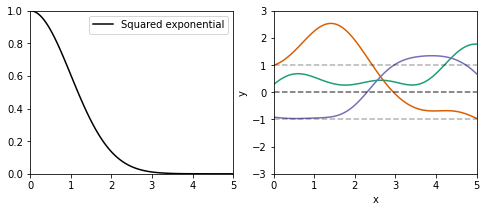

In [6]:
kernel=RBF(length_scale=1.0)
plot_samples1(kernel,rs)

In [7]:
kernel=Matern(length_scale=1.0,nu=1.5)
plot_samples(kernel,rs)

TypeError: plot_samples() missing 2 required positional arguments: 'k3' and 'rs'

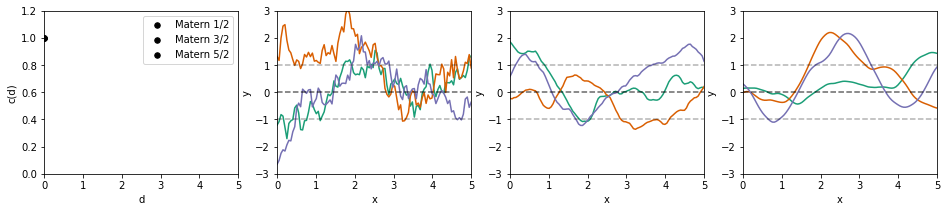

In [18]:
k1=Matern(length_scale=1.0,nu=0.5)
k2=Matern(length_scale=1.0,nu=1.5)
k3=Matern(length_scale=1.0,nu=2.5)
plot_samples(k1,k2,k3,rs)

AttributeError: 'function' object has no attribute 'requires_vector_input'

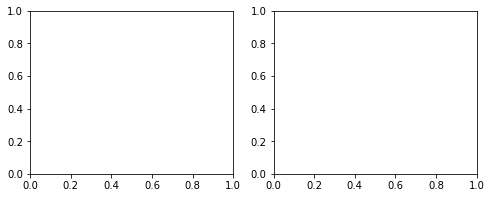

In [9]:


plot_samples1(diag_kernel,rs)
    

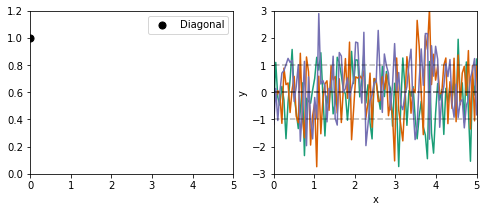

In [22]:
kernel=RBF(length_scale=1e-5)
plot_samples1(kernel,rs)